<a href="https://colab.research.google.com/github/Sourabh7k-Insights/Netflix_Project/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: Netflix - Data Exploration and Visualisation

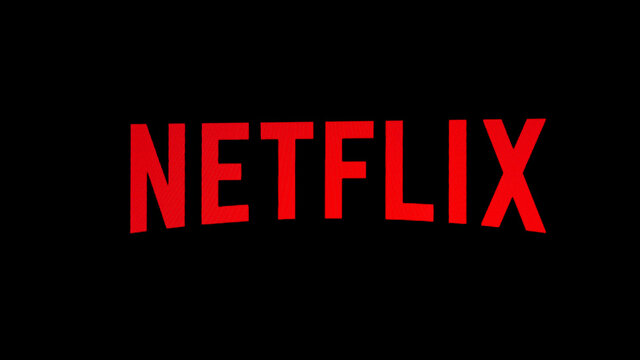

In [1]:
# @title Netflix  {"display-mode":"code"}
from IPython.display import Image

# Display the uploaded image
Image(filename='/content/sample_data/Netflix_image.jpg',width=1300, height=800)

##Input Provided :
###Dataset:
This tabular dataset consists of listings of all the movies and tv shows available on
Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Link : https://www.kaggle.com/shivamb/netflix-shows


##Basic Analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/sample_data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
df['cast']=df['cast'].str.split(', ')
df=df.explode('cast').reset_index(drop=True)
df['listed_in']=df['listed_in'].str.split(', ')
df=df.explode('listed_in').reset_index(drop=True)

In [5]:
df['director'].fillna('Unknown Director',inplace=True)
df['cast'].fillna('Unknown Cast',inplace=True)
df['country'].fillna('Unknown Country',inplace=True)
df['date_added'].fillna('Unknown',inplace=True)
df['rating'].fillna('Unknown',inplace=True)
df['duration'].fillna('Unknown',inplace=True)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [6]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['date_added']=df['date_added'].dt.strftime('%Y-%m-%d')
df['date_added'].fillna('Unknown',inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [7]:
df.drop(['description','show_id'],axis=1,inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


##Data Cleaning
1. Load Your Data and Inspecting the Data
2. Filling the Missing Values where required.
3. Bringing the data to Correct format for Further Extraction of necessary Columns
4. Drop Unnecessary Columns


##1. Counts of Categorical Variables

a. Non-Graphical Analysis

In [8]:
df['type'].value_counts().reset_index()


,type,count
0,Movie,101692
1,TV Show,47820


In [9]:
rating_counts = df['rating'].value_counts().reset_index()
rating_counts_filtered = rating_counts[ ~rating_counts['rating'].str.contains('min', case=False) &
    (rating_counts['rating'] != 'Unknown')]
rating_counts_filtered


,rating,count
0,TV-MA,56695
1,TV-14,38644
2,R,15152
3,TV-PG,11944
4,PG-13,9860
5,PG,5955
6,TV-Y7,4287
7,TV-G,2435
8,TV-Y,2407
9,NR,1133


##b. Graphical Analysis

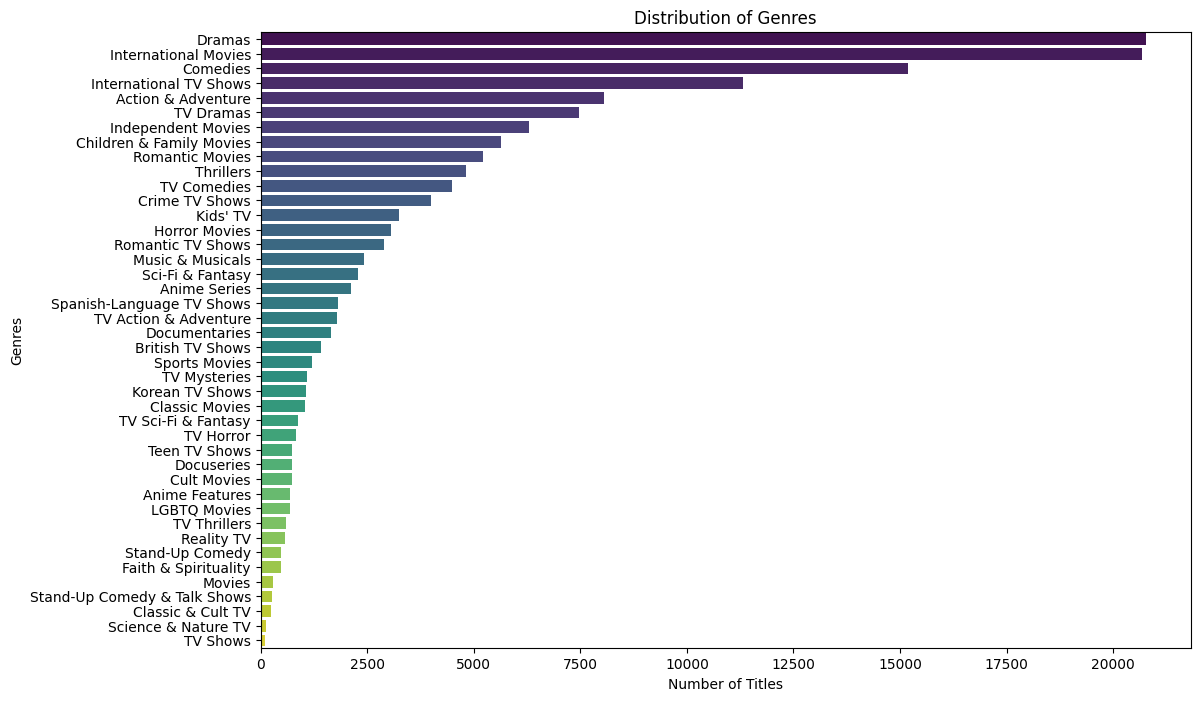

In [10]:
genre_counts = df['listed_in'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

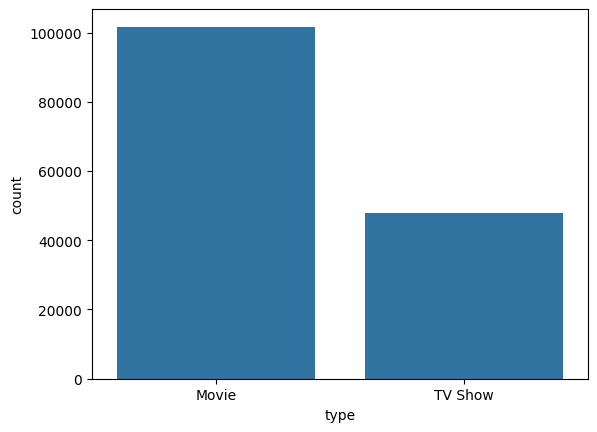

In [11]:
sns.countplot(data=df, x='type')
plt.show()

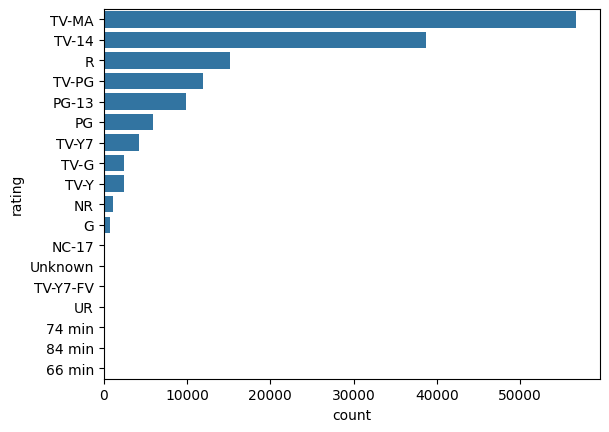

In [12]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.show()

##2. Comparison of TV Shows vs. Movies
###a. Top 10 Countries Producing Movies

In [13]:
movies = df[(df['type'] == 'Movie') & (df['country'] != 'Unknown Country')]
top_10_countries_movies = movies.groupby('country')['title'].nunique().nlargest(10).reset_index()
print('Top 10 Countries Producing Movies:')
top_10_countries_movies

Top 10 Countries Producing Movies:


,country,title
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Japan,76
9,Turkey,76


##b. Top 10 Countries Producing TV Shows

In [14]:
tv_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'Unknown Country')]
top_10_countries_tv_shows = tv_shows.groupby('country')['title'].nunique().nlargest(10).reset_index()
print('Top 10 Countries Producing TV Shows:')
top_10_countries_tv_shows

Top 10 Countries Producing TV Shows:


,country,title
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


##Insights & Recommedations:
**1.India's Strong Presence:** India ranks second in movie production (893) but is much lower for TV shows (79), indicating a greater focus on film compared to series.

**2.Emerging Countries:** Countries like Canada (122 movies, 59 TV shows) and Spain (97 movies, 48 TV shows) contribute notably to both areas but have a more limited output compared to the top two countries.

##Recommedations
**1.Investment in TV Show Production:** Countries with high movie output but lower TV show production (like India and Egypt) could benefit from investing in TV series to leverage their existing storytelling strengths.

**2.Market Research:** Conducting thorough market research to understand viewer preferences in emerging markets (like Nigeria and Indonesia) could open new avenues for producing localized content that resonates with those audiences.



##3. Best Time to Launch a TV Show or Movie
a. Best Week to Release

In [15]:
df['week'] = pd.to_datetime(df['date_added'], errors='coerce').dt.strftime('%U')

df['week'] = df['week'].fillna(-1).astype(int)

best_week_movies = df[(df['type'] == 'Movie') & (df['week'] != -1)].groupby('week')['title'].count().sort_values(ascending=False).reset_index()

print("Best Week for Movies:")
best_week_movies.head()

Best Week for Movies:


,week,title
0,0,4606
1,39,4254
2,26,3790
3,35,3697
4,8,3578


In [16]:
df['week'] = pd.to_datetime(df['date_added'], errors='coerce').dt.strftime('%U')

df['week'] = df['week'].fillna(-1).astype(int)

best_week_tv_shows = df[(df['type'] == 'TV Show') & (df['week'] != -1)].groupby('week')['title'].count().sort_values(ascending=False).reset_index()

print("Best Week for TV Shows:")
best_week_tv_shows.head()

Best Week for TV Shows:


,week,title
0,27,1671
1,26,1472
2,39,1392
3,48,1387
4,31,1379


##b. Best Month to Release

In [17]:
df['month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month

best_month_movies = df[df['type'] == 'Movie'].groupby('month')['title'].count().sort_values(ascending=False).reset_index()
print("Best Month for Movies:")
best_month_movies.head()


Best Month for Movies:


,month,title
0,7.0,9608
1,12.0,9131
2,1.0,9089
3,10.0,9051
4,9.0,8934


In [18]:
best_month_tv_shows = df[df['type'] == 'TV Show'].groupby('month')['title'].count().sort_values(ascending=False).reset_index()
print("Best Month for TV Shows:")
best_month_tv_shows.head()

Best Month for TV Shows:


,month,title
0,7.0,4646
1,12.0,4499
2,6.0,4272
3,8.0,4264
4,9.0,4118


##Insights and Recommendations:
**For Movies:** The significant number of titles added in weeks 26 and 39 indicates that certain periods of the year are particularly favorable for releasing movies, possibly aligned with summer or holiday viewing patterns.

**Audience Engagement Strategy:** The data highlights Netflix’s effective content release strategy, ensuring a well-rounded variety of movies throughout the year to keep viewers engaged, especially during months of **July, December, January, Sept & October** known for higher viewership rates.

**For TV Shows:**The closeness in title counts across several weeks (26, 39, 48) demonstrates a consistent strategy to keep TV shows coming throughout the year, ensuring varied content for audiences.

The data suggests a well-planned content strategy that aligns with audience behavior, ensuring a diverse range of TV shows are available during peak viewing months,particularly **during the summer and holiday seasons**. thus optimizing viewer engagement and satisfaction.

**Recommedations:**

**1.Maximize Seasonal Opportunities:** Consider thematic content releases that align with holidays or seasonal events to capitalize on viewer interest and boost subscriptions during peak viewing times.

**2.Cross-Promotion:** Use high-release weeks for movies and TV shows to promote new series that could complement existing titles, potentially increasing overall viewer retention and satisfaction.


###4. Analysis of actors/directors of different types of shows/movies.
####a. Top 10 Actors

In [19]:
df['cast'] = df['cast'].fillna('Unknown')
df_exploded_cast = df.assign(cast=df['cast'].str.split(',')).explode('cast')

df_exploded_cast = df_exploded_cast[df_exploded_cast['cast'] != 'Unknown Cast']

tv_shows_cast = df_exploded_cast[df_exploded_cast['type'] == 'TV Show']

top_10_tv_show_actors = tv_shows_cast.groupby('cast')['title'].nunique().nlargest(10).reset_index()

print("Top 10 Actors in TV Shows:")
top_10_tv_show_actors

Top 10 Actors in TV Shows:


,cast,title
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Ai Kayano,17
3,Daisuke Ono,17
4,Junichi Suwabe,17
5,Yuichi Nakamura,16
6,Jun Fukuyama,15
7,Yoshimasa Hosoya,15
8,David Attenborough,14
9,Hiroshi Kamiya,13


###Insights:

**1.Dominance of Japanese Voice Actors:** The top actors in TV shows are predominantly Japanese voice actors like Takahiro Sakurai and Yuki Kaji, indicating a significant presence of anime content on Netflix.

**2.Anime's Strong Presence:** The recurring names of Japanese actors suggest that Netflix’s content library has a strong focus on anime, which caters to a global fanbase.

In [20]:
movies_cast = df_exploded_cast[df_exploded_cast['type'] == 'Movie']
top_10_movie_actors = movies_cast.groupby('cast')['title'].nunique().nlargest(10).reset_index()
print("\nTop 10 Actors in Movies:")
top_10_movie_actors



Top 10 Actors in Movies:


,cast,title
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Akshay Kumar,30
4,Om Puri,30
5,Amitabh Bachchan,28
6,Julie Tejwani,28
7,Paresh Rawal,28
8,Boman Irani,27
9,Rupa Bhimani,27


###Insights:
**1.Bollywood Dominance:** The top actors in movies are predominantly from Bollywood, with Anupam Kher leading with 42 titles, followed by Shah Rukh Khan and Naseeruddin Shah. This indicates a substantial focus on Indian cinema on Netflix.

**2.Veteran Actors Lead the List:** The list features veteran actors like Amitabh Bachchan, Om Puri, and Paresh Rawal, indicating that classic Indian movies and long-standing actors have a significant influence.

###b. Top 10 Directors

In [21]:
df['director'] = df['director'].fillna('Unknown Director')

df['director'] = df['director'].str.split(',')
df_exploded_director = df.explode('director')

df_exploded_director = df_exploded_director[df_exploded_director['director'] != 'Unknown Director']

movies_directors = df_exploded_director[df_exploded_director['type'] == 'Movie']

top_10_movie_directors = movies_directors.groupby('director')['title'].nunique().nlargest(10).reset_index()

print("Top 10 Directors for Movies:")
top_10_movie_directors


Top 10 Directors for Movies:


,director,title
0,Rajiv Chilaka,22
1,Jan Suter,18
2,Raúl Campos,18
3,Suhas Kadav,16
4,Jay Karas,15
5,Marcus Raboy,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


##Insights:
**1.Popularity of Animation and Family Content:** Directors like Rajiv Chilaka and Jan Suter, known for animated and family-oriented films, reflect Netflix's focus on producing content for younger audiences and families.

**2.Significance of Genre Variety:** The presence of directors from various genres (e.g., animation, drama) showcases Netflix’s commitment to catering to diverse viewer preferences.




In [22]:
tv_shows_directors = df_exploded_director[df_exploded_director['type'] == 'TV Show']
top_10_tv_show_directors = tv_shows_directors.groupby('director')['title'].nunique().nlargest(10).reset_index()
print("\nTop 10 Directors for TV Shows:")
top_10_tv_show_directors



Top 10 Directors for TV Shows:


,director,title
0,Alastair Fothergill,3
1,Ken Burns,3
2,Gautham Vasudev Menon,2
3,Hsu Fu-chun,2
4,Iginio Straffi,2
5,Joe Berlinger,2
6,Jung-ah Im,2
7,Rob Seidenglanz,2
8,Shin Won-ho,2
9,Stan Lathan,2


##Insights
**1.Documentary Influence:** The presence of directors like Alastair Fothergill and Ken Burns indicates a strong inclination toward documentary-style storytelling, appealing to audiences interested in real-life narratives and informative content.

**2.Variety in Genres:** The range of directors and the genres they represent (from documentaries to scripted shows) indicates Netflix's effort to cater to a wide variety of viewer preferences and interests.



##5. Count of  movies by Genre are produced more

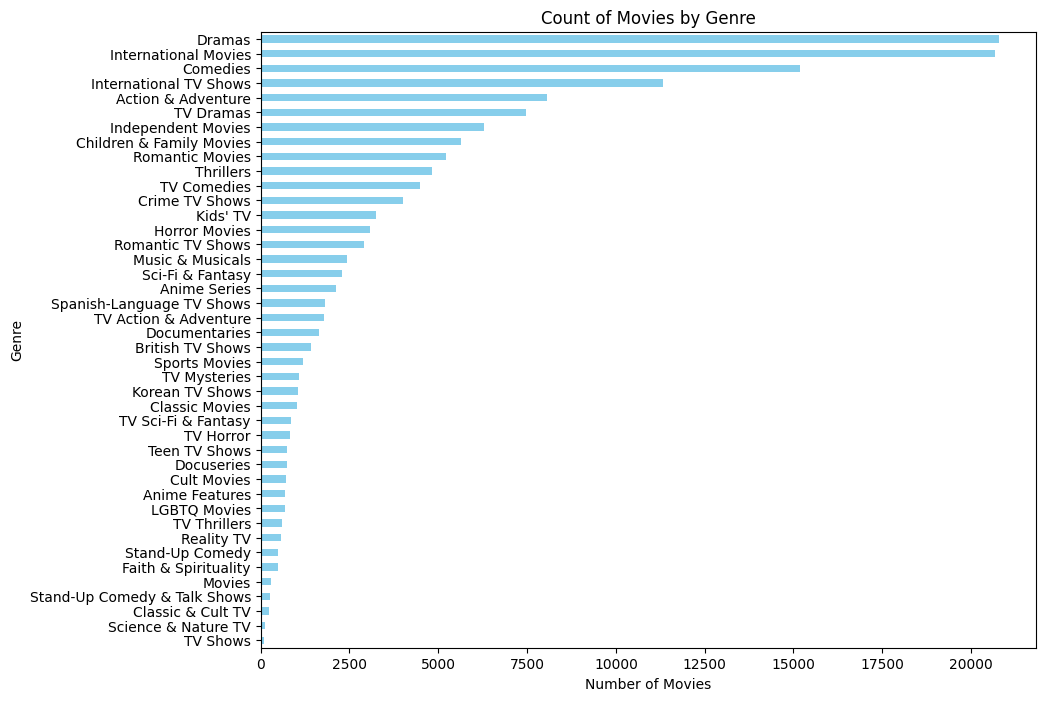

In [23]:
df['listed_in'] = df['listed_in'].fillna('')
df['listed_in'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('listed_in')

genre_counts = df_exploded['listed_in'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Count of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


##Insights & Recommendations
###Insights:

1.Dramas and International Movies lead the genre distribution on Netflix, with counts of **20,778 and 20,669** respectively, indicating a strong preference for storytelling-focused content and globally diverse movies.

2.Comedies are also highly produced, with **15,197 titles**, showing a considerable demand for light-hearted and humor-driven content across different regions.

3.International TV Shows and Action & Adventure are the top genres in TV shows, with counts of **11,319 and 8,060**, suggesting Netflix’s strategy to cater to a global audience with high-energy and diverse programming

**Recommedations:**

**1.Expand Global Content:** Increase production in International Movies and TV Shows.

**2.Enhance Popular Genres:** Focus on producing more Dramas, Comedies, and Action & Adventure.

**3.Boost Youth Content:** Strengthen Kids' TV and Family segments with more animated and family-friendly content.

**4.Diversify Offerings:** Invest in niche genres like Horror, LGBTQ Movies, and Anime.

**5.Explore Sub-genres:** Develop more titles within sub-genres of popular categories like Romantic TV Shows and Sci-Fi & Fantasy.

##6. Days Between Release and Netflix Addition


Mode of days between release and Netflix addition for Movies: 424


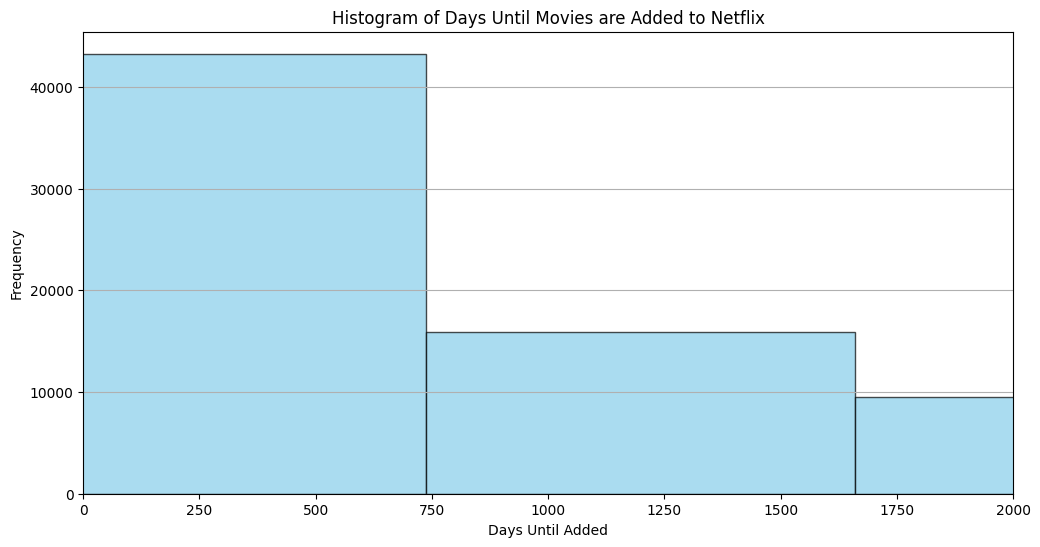

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

movies_df = df[df['type'] == 'Movie']

movies_df['days_until_added'] = (movies_df['date_added'] - movies_df['release_year']).dt.days

mode_days_until_added = movies_df['days_until_added'].mode()[0]
print(f"Mode of days between release and Netflix addition for Movies: {mode_days_until_added}")

plt.figure(figsize=(12, 6))
plt.hist(movies_df['days_until_added'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Days Until Movies are Added to Netflix')
plt.xlabel('Days Until Added')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.grid(axis='y')
plt.show()


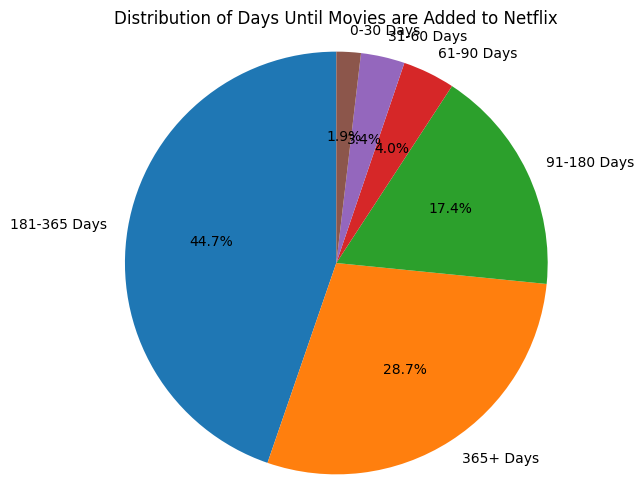

In [25]:
bins = [0, 30, 60, 90, 180, 365, 500]
labels = ['0-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', '365+ Days']
movies_df['added_category'] = pd.cut(movies_df['days_until_added'], bins=bins, labels=labels, right=False)

category_counts = movies_df['added_category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Days Until Movies are Added to Netflix')
plt.axis('equal')
plt.show()


##Insights & Recommendations
###For Movies released and added Netflix:
1.The mode of days between a movie's release and its addition to Netflix is **424 days**.

2.This indicates a significant delay in adding movies after their release.

3.The lengthy duration could be due to complex **licensing negotiations and acquisition processes.**

4.Such delays may affect the freshness of content available on the platform, potentially impacting user engagement.

5.This insight suggests that Netflix prioritizes older movies for their content library rather than newly released titles.

Mode of days between release and Netflix addition for TV Shows: 186.0


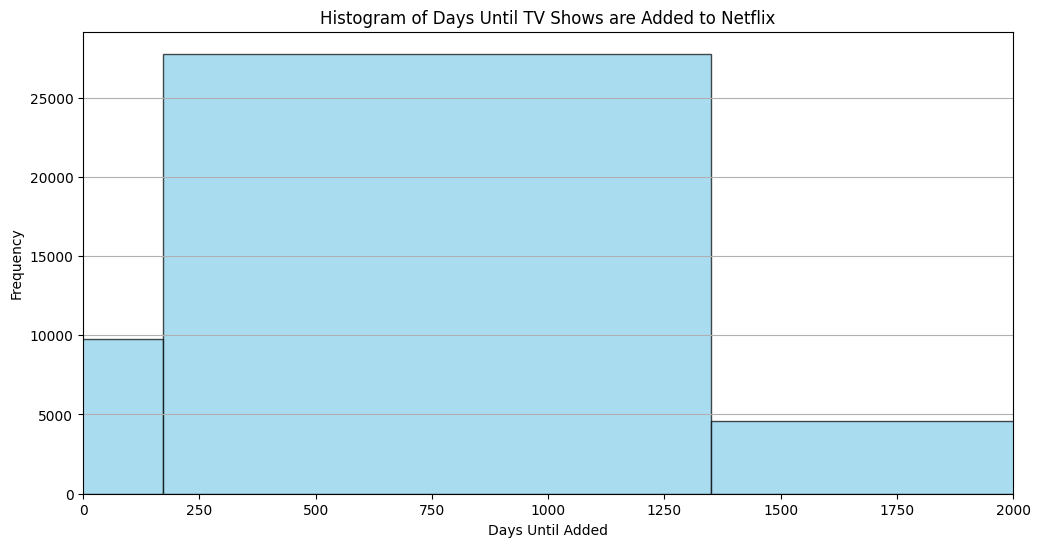

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

tv_shows_df = df[df['type'] == 'TV Show']

tv_shows_df['days_until_added'] = (tv_shows_df['date_added'] - tv_shows_df['release_year']).dt.days

mode_days_until_added_tv = tv_shows_df['days_until_added'].mode()[0]
print(f"Mode of days between release and Netflix addition for TV Shows: {mode_days_until_added_tv}")

plt.figure(figsize=(12, 6))
plt.hist(tv_shows_df['days_until_added'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Days Until TV Shows are Added to Netflix')
plt.xlabel('Days Until Added')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.grid(axis='y')
plt.show()


##Insights & Recommendations
###For TV Shows released and added Netflix:
1.The mode of days between a TV show's release and its addition to Netflix is **186 days.**

2.This shorter time frame implies a **quicker acquisition process** compared to movies.

3.Faster addition of TV shows helps in maintaining timely and fresh content for subscribers.

4.The **shorter gap** might be due to simpler licensing agreements or exclusive deals with production studios.

5.This strategy allows Netflix to keep up with viewer **demand for new and trending TV shows.**

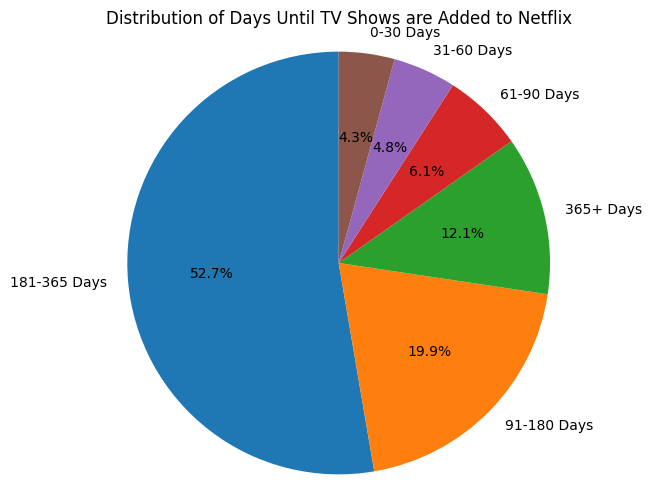

In [27]:
bins = [0, 30, 60, 90, 180, 365, 500]
labels = ['0-30 Days', '31-60 Days', '61-90 Days', '91-180 Days', '181-365 Days', '365+ Days']
tv_shows_df['added_category'] = pd.cut(tv_shows_df['days_until_added'], bins=bins, labels=labels, right=False)

category_counts = tv_shows_df['added_category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Days Until TV Shows are Added to Netflix')
plt.axis('equal')
plt.show()

##Overall Recommendations:
**1.Expand Content Library Based on Country Trends:**

With the U.S. and India being the top contributors to Netflix's library, Netflix should continue to invest in local content production in these countries. Additionally, exploring markets like Nigeria and Japan, which show promising viewership, can help expand its audience base.

**2.Optimize Release Timing:**

Insights on the best weeks and months for releasing movies and TV shows indicate strategic opportunities. Netflix should schedule releases around peak viewing times (e.g., summer and the holiday season) to maximize audience engagement.

**3.Increase Marketing for Lesser-Known Genres:**

While dramas and comedies dominate viewership, genres like documentaries and thrillers have niche audiences. Targeted marketing campaigns can elevate these genres and attract a wider audience.

